Machine Learning Practice Clustering
---

### Environment Setup

In this pratice, I will explore Clustering with SciKit-Learn 

The problem is to cluster loan data based on input features and see if there a pattern recognized by clustering


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
loan_data = pd.read_csv('./loans_cleaned2.csv')
loan_data.columns

Index(['annual_inc', 'application_type', 'bc_open_to_buy', 'bc_util',
       'home_ownership', 'int_rate', 'loan_amnt', 'max_bal_bc',
       'percent_bc_gt_75', 'term', 'title', 'total_bc_limit', 'total_rec_int',
       'total_rev_hi_lim', 'verification_status', 'grade_int',
       'emp_length_int'],
      dtype='object')

### 1) Data Preparation

1.1) Create a new column grade_category which is derived from 'grade_int' column. Grades 1-3 will be grouped as 1 , 4-5 grouped as 2 and >5 grouped as 3. Show the distribution of values in 'grade_int' and 'grade_category'


In [3]:
def group(x):
    if x in (1,2,3):
        return 1
    elif x in (4,5):
        return 2
    else:
        return 3
loan_data['grade_category']=loan_data['grade_int'].apply(group)

category_1=(loan_data['grade_category']==1).sum()
category_2=(loan_data['grade_category']==2).sum()
category_3=(loan_data['grade_category']==3).sum()

grade_int_value=loan_data['grade_int'].value_counts()

print('**The distribution of values in grade_int are:\n',grade_int_value)
print('**The distribution of values in grade_category are:\n','Category 1:',category_1, 'Category 2:',category_2, 'Category 3:',category_3)

**The distribution of values in grade_int are:
 3    9766
5    7954
7    5290
6    5159
4    4194
2    1301
1     268
Name: grade_int, dtype: int64
**The distribution of values in grade_category are:
 Category 1: 11335 Category 2: 12148 Category 3: 10449


1.2) Drop all non number columns. Show the top 5 entries in the new dataframe.

In [4]:
loan_data.drop(labels=['application_type','home_ownership','term','title','verification_status'], axis=1,inplace=True)
loan_data.head(5)

,annual_inc,bc_open_to_buy,bc_util,int_rate,loan_amnt,max_bal_bc,percent_bc_gt_75,total_bc_limit,total_rec_int,total_rev_hi_lim,grade_int,emp_length_int,grade_category
0,65000.0,232.0,96.9,23.40,9600,2264,85.7,7600,352.04,28500,3,4.0,1
1,33000.0,4596.0,66.9,26.31,16000,2703,55.6,13900,663.64,34900,3,1.0,1
2,90000.0,9503.0,83.8,23.40,13000,18037,66.7,58600,476.73,62600,3,2.0,1
3,43000.0,126.0,94.5,23.40,8000,2174,100.0,2300,293.37,11100,3,5.0,1
4,49700.0,491.0,82.5,23.40,3300,2091,50.0,2800,121.01,8900,3,2.0,1


1.3) Drop all rows with nan values and show that there are no nan values left

In [5]:
loan_data.dropna(axis=0,inplace=True) 
loan_data.isna().sum()

annual_inc          0
bc_open_to_buy      0
bc_util             0
int_rate            0
loan_amnt           0
max_bal_bc          0
percent_bc_gt_75    0
total_bc_limit      0
total_rec_int       0
total_rev_hi_lim    0
grade_int           0
emp_length_int      0
grade_category      0
dtype: int64

1.4) Show the current distribution of grade_int and grade_category

In [6]:
category_1_2=(loan_data['grade_category']==1).sum()
category_2_2=(loan_data['grade_category']==2).sum()
category_3_2=(loan_data['grade_category']==3).sum()

grade_int_value_2=loan_data['grade_int'].value_counts()

print('**The distribution of values in grade_int are:\n',grade_int_value_2)
print('**The distribution of values in grade_category are:\n','Category 1:',category_1_2, 'Category 2:',category_2_2, 'Category 3:',category_3_2)

**The distribution of values in grade_int are:
 3    8619
5    7049
7    4854
6    4652
4    3722
2    1179
1     232
Name: grade_int, dtype: int64
**The distribution of values in grade_category are:
 Category 1: 10030 Category 2: 10771 Category 3: 9506


1.5) Split data into train and test sets. For input feature vector X, use all columns except 'int_rate', 'grade_int' and 'grade_category'. For label feature vector Y, use 'grade_int' and 'grade_category'. Then create X_train, y_train and X_test, y_test. Use train_test_split library from sklearn and use random_state=50. Test dataset should be 25% of whole dataset.

In [7]:
X=loan_data.drop(['int_rate','grade_int','grade_category'],axis=1)
Y=loan_data[['grade_int','grade_category']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=50, test_size=0.25)

1.6) Check the distribution of 'grade_int' values. For the train set and test set, show the number of entries for each label. 
Instead of showing it as a count, show it as a ratio w.r.t to the total number of train samples and test samples respectively. <br>

In [8]:
y_train_grade=y_train['grade_int'].value_counts()
y_test_grade=y_test['grade_int'].value_counts()

y_train_entry=len(y_train['grade_int'])
y_test_entry=len(y_test['grade_int'])

print('**The distribution of values in grade_int in train set are:\n', y_train_grade/y_train_entry)
print('**The distribution of values in grade_int in test set are:\n', y_test_grade/y_test_entry)

**The distribution of values in grade_int in train set are:
 3    0.287374
5    0.231632
7    0.162165
6    0.150462
4    0.122921
2    0.037747
1    0.007699
Name: grade_int, dtype: float64
**The distribution of values in grade_int in test set are:
 3    0.275439
5    0.235449
6    0.162597
7    0.154151
4    0.122476
2    0.042365
1    0.007523
Name: grade_int, dtype: float64


### 2)K means clustering

2.1) Use SK learn standardscalar to train a scaler on X_train. Using the scaler, scale X_train, X_test to X_train_scaled and X_test_scaled. 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

2.2) Show mean and standard deviation of each feature dimension in X_train_scaled and X_test_scaled.

In [10]:
X_train_column = X_train.columns
X_test_column = X_test.columns

X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train_column)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_test_column)

X_train_mean=X_train_scaled.mean()
X_test_mean=X_test_scaled.mean()

X_train_sd=X_train_scaled.std()
X_test_sd=X_test_scaled.std()

print('Mean of X_train_scaled are:\n',X_train_mean)
print('Standard Deviation of X_train_scaled are:\n',X_train_sd)

print('Mean of  X_test_scaled:\n',X_test_mean)
print('Standard Deviation of  X_test_scaled:\n',X_test_sd)

Mean of X_train_scaled are:
 annual_inc          4.402916e-16
bc_open_to_buy     -4.064183e-17
bc_util             3.411066e-16
loan_amnt           1.264106e-16
max_bal_bc         -4.112661e-17
percent_bc_gt_75   -2.187134e-16
total_bc_limit      8.716936e-17
total_rec_int      -4.742748e-18
total_rev_hi_lim    4.249912e-17
emp_length_int     -5.371369e-17
dtype: float64
Standard Deviation of X_train_scaled are:
 annual_inc          1.000022
bc_open_to_buy      1.000022
bc_util             1.000022
loan_amnt           1.000022
max_bal_bc          1.000022
percent_bc_gt_75    1.000022
total_bc_limit      1.000022
total_rec_int       1.000022
total_rev_hi_lim    1.000022
emp_length_int      1.000022
dtype: float64
Mean of  X_test_scaled:
 annual_inc          0.005043
bc_open_to_buy     -0.005184
bc_util            -0.015989
loan_amnt          -0.008791
max_bal_bc         -0.007886
percent_bc_gt_75   -0.011134
total_bc_limit     -0.012087
total_rec_int      -0.011989
total_rev_hi_lim   -0

2.3) Train a Kmeans cluster on X_train_scaled. From now on, we will only work with scaled training and test data. Set number of clusters to 5 and do a parallel plot to see the cluster centers.

The plot should have xlabel as "feature names", ylabel as "scaled values" and a legend indicating which plot corresponds to which cluster number

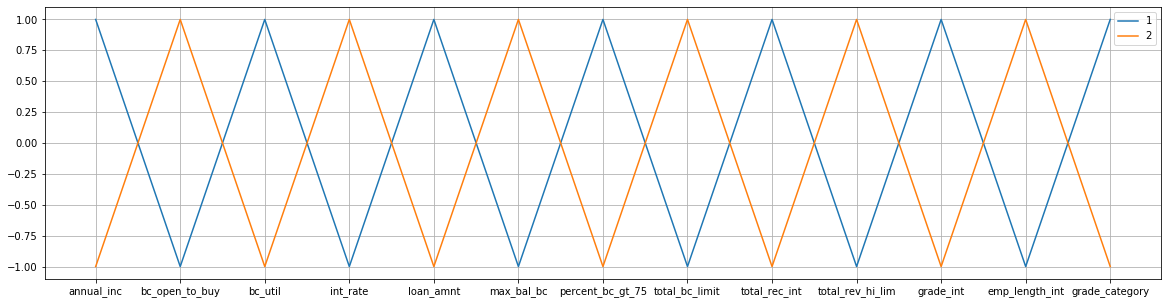

In [12]:
# Sample parallel plot
feats = loan_data.columns
plt.figure(figsize=(20,5))

c1 = [ (-1)**i for i in range(len(feats)) ]
c2 = [ (-1)**(i+1) for i in range(len(feats)) ]
plt.plot(feats, c1)
plt.plot(feats, c2)
plt.grid(True)
plt.legend([1,2])
plt.show()
#print(feats)

[[-0.19924878  0.02542777 -0.78733884 -0.30920107 -0.4584213  -0.81094303
  -0.25471051 -0.286508   -0.24007356 -0.08020989]
 [-0.06899204 -0.34639921  0.46225431  0.85311887 -0.00933905  0.45013747
  -0.22761878  3.02892138 -0.17957481  0.15815129]
 [ 0.65666256  0.01781272  0.47898252  0.97318358  1.17894995  0.33920769
   0.69053117 -0.08987235  0.61420975  0.1732115 ]
 [ 0.69970402  2.72490363 -0.91517976  0.6259171   0.79987108 -0.73349659
   2.52626932 -0.24199667  2.22080559  0.08915104]
 [-0.19205592 -0.57263218  0.92842073 -0.38680243 -0.13298188  0.99060113
  -0.5052526  -0.18977871 -0.43044327 -0.03136793]]


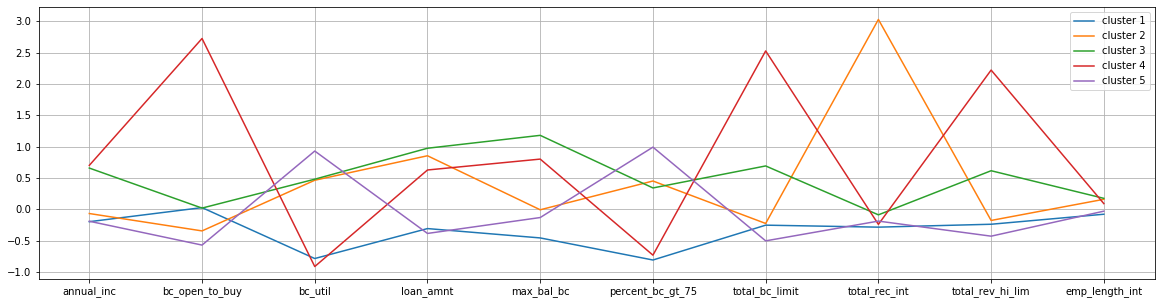

In [13]:
from sklearn.cluster import KMeans
estimator=KMeans(n_clusters=5)
estimator.fit(X_train_scaled)

centers=estimator.cluster_centers_
print(centers)

feats = X_train_scaled.columns
plt.figure(figsize=(20,5))

c1=centers[0]
c2=centers[1]
c3=centers[2]
c4=centers[3]
c5=centers[4]

plt.plot(feats, c1)
plt.plot(feats, c2)
plt.plot(feats, c3)
plt.plot(feats, c4)
plt.plot(feats, c5)

plt.grid(True)
plt.legend(['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5'])
plt.show()

In [14]:
loan_data.corr()

,annual_inc,bc_open_to_buy,bc_util,int_rate,loan_amnt,max_bal_bc,percent_bc_gt_75,total_bc_limit,total_rec_int,total_rev_hi_lim,grade_int,emp_length_int,grade_category
annual_inc,1.000000,0.166952,0.040163,-0.084414,0.254054,0.318314,0.028199,0.324706,0.008425,0.362010,0.082669,0.046857,0.082591
bc_open_to_buy,0.166952,1.000000,-0.515607,-0.313244,0.191243,0.173424,-0.423497,0.821608,-0.095999,0.650088,0.318044,0.012740,0.304212
bc_util,0.040163,-0.515607,1.000000,0.279994,0.046308,0.316983,0.851469,-0.185695,0.152152,-0.138814,-0.282931,0.038090,-0.273756
int_rate,-0.084414,-0.313244,0.279994,1.000000,0.018275,-0.058382,0.286313,-0.240560,0.489033,-0.198268,-0.979693,0.026030,-0.944237
loan_amnt,0.254054,0.191243,0.046308,0.018275,1.000000,0.321290,0.020625,0.331311,0.333016,0.308925,-0.012472,0.045225,0.006058
max_bal_bc,0.318314,0.173424,0.316983,-0.058382,0.321290,1.000000,0.234915,0.593844,0.045745,0.500865,0.059995,0.039323,0.059323
percent_bc_gt_75,0.028199,-0.423497,0.851469,0.286313,0.020625,0.234915,1.000000,-0.157588,0.150184,-0.110381,-0.289017,0.040255,-0.280108
total_bc_limit,0.324706,0.821608,-0.185695,-0.240560,0.331311,0.593844,-0.157588,1.000000,-0.029168,0.810653,0.244015,0.042400,0.234560
total_rec_int,0.008425,-0.095999,0.152152,0.489033,0.333016,0.045745,0.150184,-0.029168,1.000000,-0.013381,-0.493048,0.044727,-0.473241
total_rev_hi_lim,0.362010,0.650088,-0.138814,-0.198268,0.308925,0.500865,-0.110381,0.810653,-0.013381,1.000000,0.201390,0.068129,0.194736


2.4) Interpreting clusters from parallel plot <br>
Looking at the line plot, pick two clusters and interpret what kind of loans the cluster represent.

**Answer: Cluster 4 represents the group of people who has low annual income, low number of bank card above 75% limit and low amount of loan.
**Cluster 5 represents the group of people who has low annual income, low number of percent band card above 75% and high maximum current balance owned on all revolving account.


2.5) Show the histogram of training data loan grade_int associated with each cluster. Use the same model as 2.3<br>
Note: the grade_int values contain information on what is the true grade of each loan sample, while you need to use trained model from 2.4 to get what cluster each loan sample is associated with.

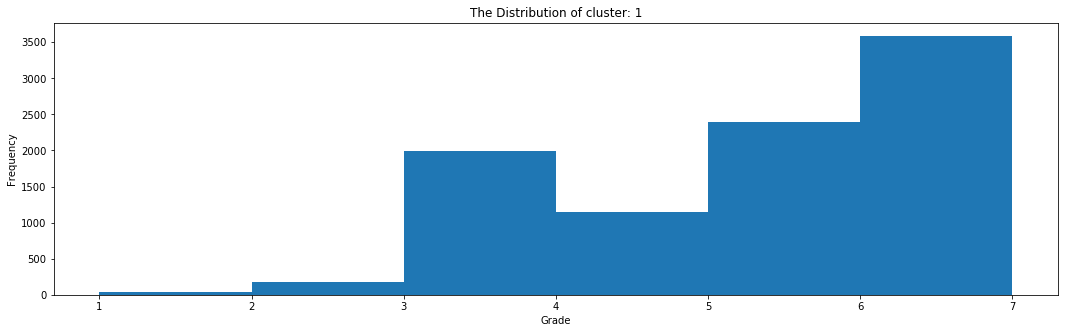

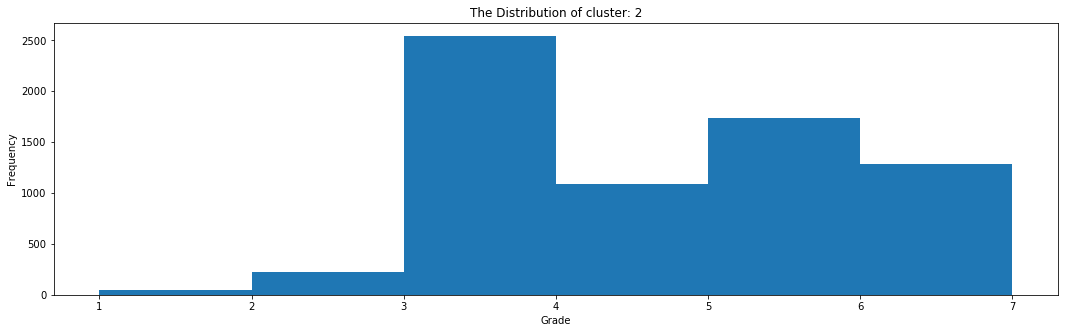

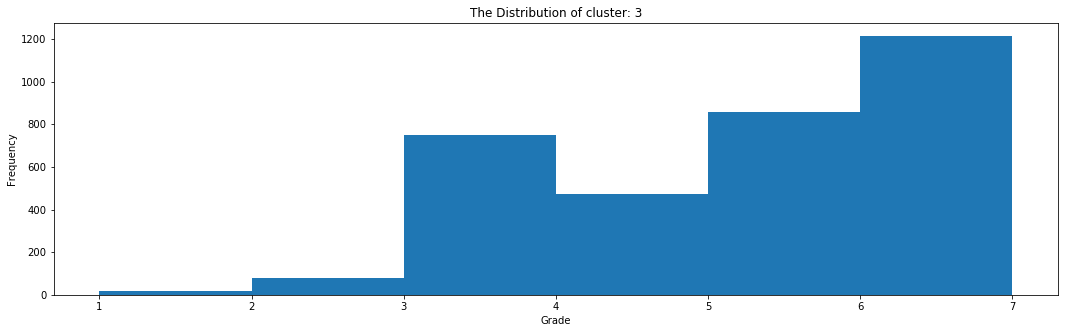

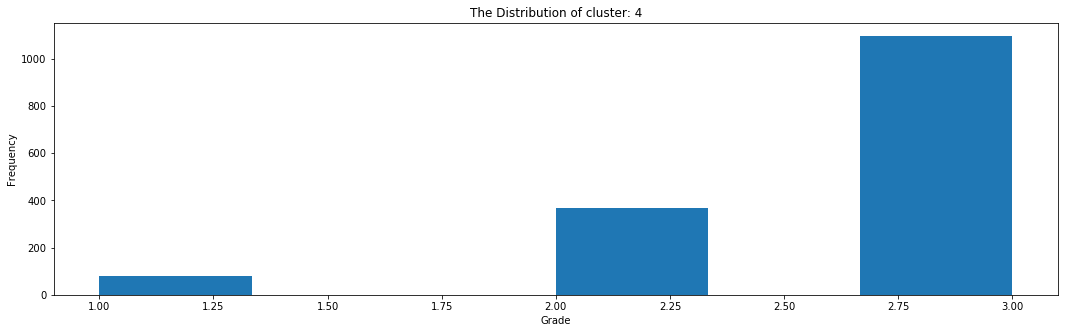

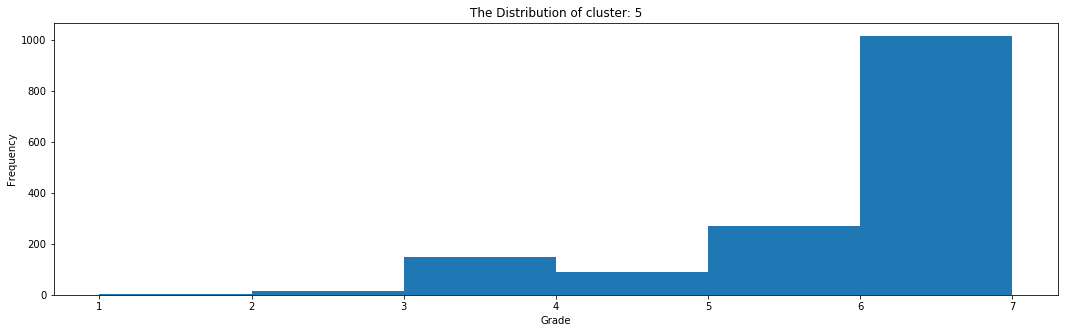

In [17]:
predicted=estimator.fit_predict(X_train_scaled)
grade=np.array(y_train['grade_int'])

results=np.column_stack((predicted,grade))

for g in range(0,5):
  temp=results[results[:,0]==g]
  plt.figure(figsize=(18,5))
  plt.hist(temp[:,1], bins=6)
  plt.xlabel('Grade')
  plt.ylabel('Frequency')
  plt.title('The Distribution of cluster: {}'.format(g+1))
  plt.show()

2.6) Show the histogram of Testing data loan grade_int associated with each cluster. Use the same model as 2.3


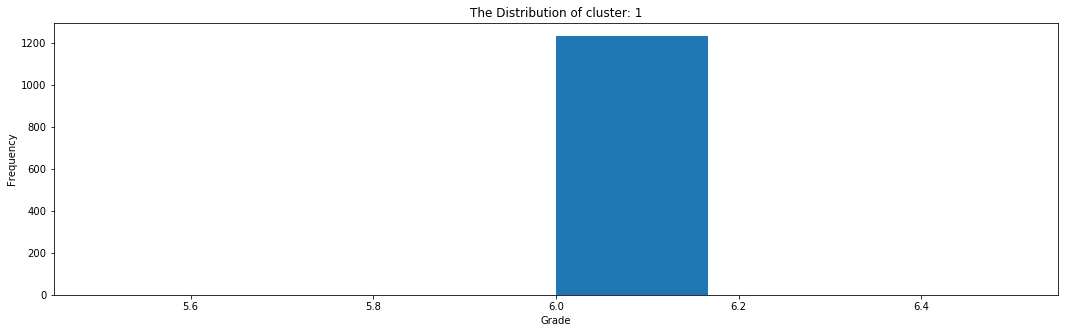

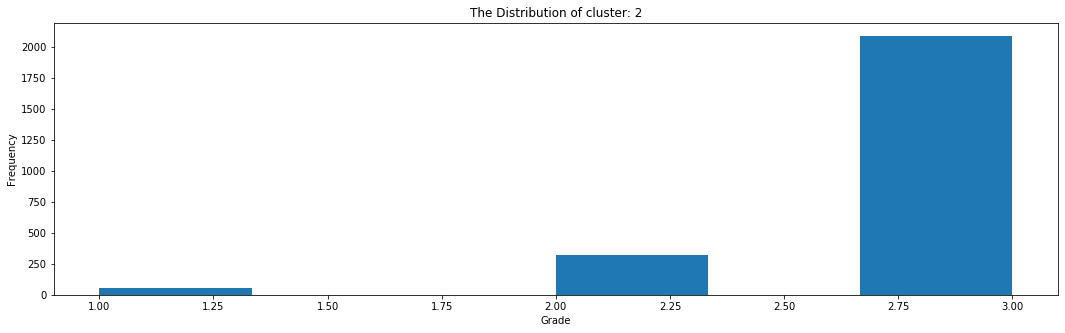

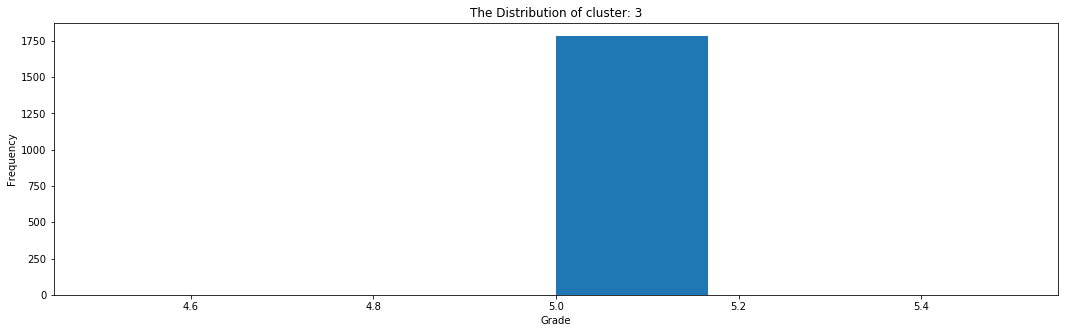

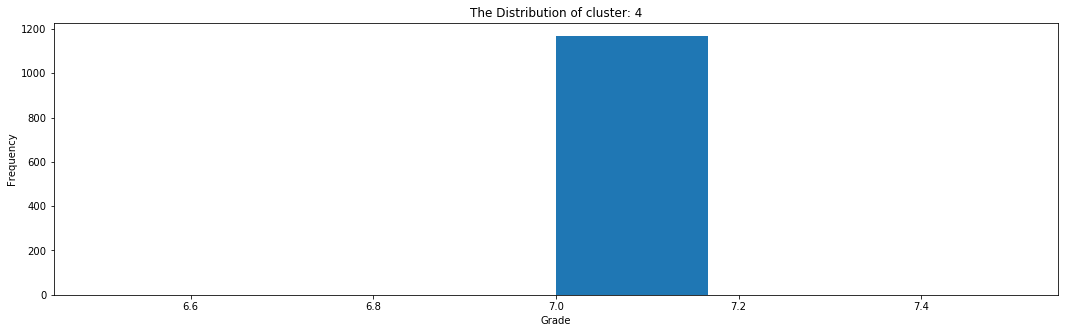

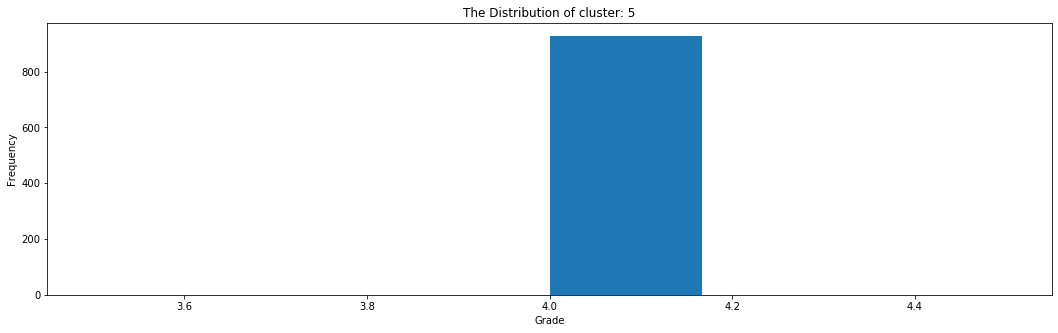

In [18]:
ytest=estimator.fit(y_test).labels_
grade_2=np.array(y_test['grade_int'])

results_2=np.column_stack((ytest,grade_2))

for i in range(0,5):
  temp_1=results_2[results_2[:,0]==i]
  plt.figure(figsize=(18,5))
  plt.hist(temp_1[:,1], bins=6)
  plt.xlabel('Grade')
  plt.ylabel('Frequency')
  plt.title('The Distribution of cluster: {}'.format(i+1))
  plt.show()

2.7) Number of training points associated with clusters <br>
Using the same mode as above. For each of the training data points, assign them to the nearest cluster. Then do a histogram of number of data points associated with each cluster.

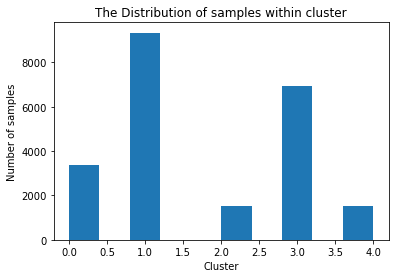

In [19]:
predicted=estimator.fit_predict(X_train_scaled)
plt.hist(predicted,bins=10)
plt.xlabel('Cluster')
plt.ylabel('Number of samples')
plt.title('The Distribution of samples within cluster')
plt.show()

2.8) The WSSE error on training data is easily available within in fitted mode. Lets look at manually computing WSSE. For that you need a function which will take the K means model, the dataset and compute the WSSE.

In [20]:
def WSSE_erro(data, Estimator):
    distances = Estimator.fit_transform(data) 
    #print(distances)
    WSSE = 0
    i = 0
    #print(model)
    for label in Estimator.labels_: 
    #print(label)
        WSSE = WSSE + (distances[i][label])**2 
        i = i + 1 
    return WSSE

In [21]:
Estimator=KMeans(n_clusters=5)
data=X_train_scaled
print(WSSE_erro(data,Estimator))

estimator.fit(X_train_scaled)
print(estimator.inertia_)

Estimator_2=KMeans(n_clusters=6)
print(WSSE_erro(data,Estimator_2))
Estimator_2.fit(X_train_scaled)
print(Estimator_2.inertia_)

127119.6886677736
127119.68866777373
118472.50715213218
118478.980569148


2.9) 3D scatter plot Visualization

Lets look at how the clusters look with a 3D scatter plot. But for this, we will have to reduce the number of features (to reduce dimension to 3). Train a K means clustering on X_train with following columns as feature: 'loan_amnt', 'annual_inc', 'emp_length_int'.  Then assign each testing data point to one of the cluster. Don't forget to scale the data.<br>
The model should have 4 clusters and in the plot, color each test data point based on their association with a cluster <br>
'r' for cluster 1, 'b' for 2, 'g' for 3 and 'y' for 4 <br>
set the labels for each axis to indicate which feature it corresponds to. <br>
Also print all unique labels in the predictions on X_test. Its ok if some clusters have no test data associated with it. <br>

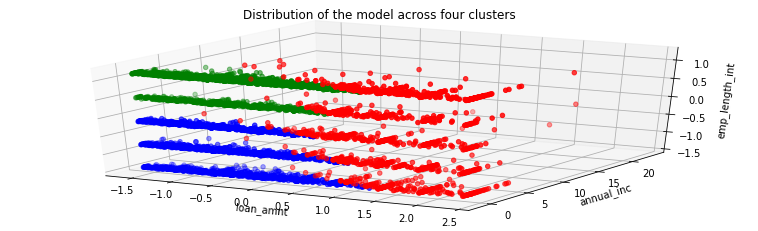

In [22]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
scaler.fit(X_train)

X_train=X_train[['loan_amnt','annual_inc','emp_length_int']]
X_test=X_test[['loan_amnt','annual_inc','emp_length_int']]

scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

Estimator_2= KMeans(n_clusters=4)
Estimator_2.fit(X_train_scaled)
predicted=Estimator_2.predict(X_test_scaled)
predicted=pd.DataFrame(predicted)
Xtest_scaled=pd.DataFrame(X_test_scaled)

combination=pd.concat([Xtest_scaled.reset_index(drop=True),predicted.reset_index(drop=True)],axis=1)
#print(combination)
combination.columns=['loan_amnt', 'annual_inc', 'emp_length_int', 'cluster']
#print(combination)

fig = plt.figure(figsize=plt.figaspect(0.3))
ax=fig.add_subplot(111,projection='3d')
x1=combination.loan_amnt[combination.cluster==0]
y1=combination.annual_inc[combination.cluster==0]
z1=combination.emp_length_int[combination.cluster==0]
x2=combination.loan_amnt[combination.cluster==1]
y2=combination.annual_inc[combination.cluster==1]
z2=combination.emp_length_int[combination.cluster==1]
x3=combination.loan_amnt[combination.cluster==2]
y3=combination.annual_inc[combination.cluster==2]
z3=combination.emp_length_int[combination.cluster==2]
x4=combination.loan_amnt[combination.cluster==3]
y4=combination.annual_inc[combination.cluster==3]
z4=combination.emp_length_int[combination.cluster==3]

ax.scatter(x1,y1,z1,c='r')
ax.scatter(x2,y2,z2,c='b')
ax.scatter(x3,y3,z3,c='g')
ax.scatter(x4,y4,z4,c='y')

ax.set_xlabel('loan_amnt')
ax.set_ylabel('annual_inc')
ax.set_zlabel('emp_length_int')
ax.set_title('Distribution of the model across four clusters')
plt.show()
